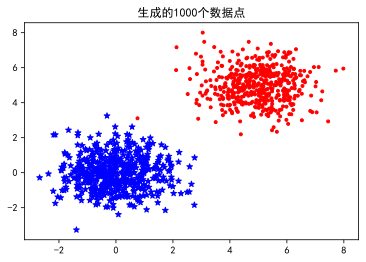

In [4]:
#数据生成
import numpy as np
import matplotlib.pyplot as plt
# 支持中文，高清显示
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
%config InlineBackend.figure_format='svg'

numbers=1000
N=numbers*70//100
class1 = np.random.randn(numbers//2,2) 
#生成第一类25个2维特征数据 
class2 = np.random.randn(numbers//2,2)+np.array([5,5])
#生成第二类25个2维特征数据 
label1 = [0]*(numbers//2)  #第一类标签0
label2 = [1]*(numbers-numbers//2) #第二类标签1
features = np.vstack((class1,class2))
labels = label1+label2
np.random.seed(100)
np.random.shuffle(features)
np.random.seed(100)
np.random.shuffle(labels)
train_data=features[:N]
train_label=labels[:N]
test_data=features[N:]
test_label=labels[N:]
plt.figure()
plt.title("生成的" + str(numbers) + "个数据点")
plt.scatter(class1[:,0],class1[:,1],c='b',marker='*')
plt.scatter(class2[:,0],class2[:,1],c='r',marker='.')
plt.show()


In [5]:
#感知机训练算法
import numpy as np
import random
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
%config InlineBackend.figure_format='svg'

# 样本点集
trainDataX = train_data
# 样本标签
trainDataY = train_label

# 权重
weight = [0, 0]
# 偏置量
bias = 0
# 学习速率,控制每一步调整权的幅度
learnRate = 0.2
# 输入最大训练次数
trainNum =200

# 激活函数
def fun(n):
    if n > 0:
        return 1
    else:
        return 0

def training():
    global weight, bias
    for j in range(trainNum):
        # 从点集中随机取数
        i = random.randint(0, len(trainDataX) - 1)
        # 获取分类结果
        result = fun(np.dot(trainDataX[i], weight) + bias)
        # 若点分类正确,则后面代码不需要执行
        if result == trainDataY[i]: 
            continue
        # 更新权重
        # 等价于下面两个式子
        weight = weight + np.dot((trainDataY[i] - result), trainDataX[i]) \
                 * learnRate
        # weight[0] = weight[0] + (trainDataY[i] - result) * \
        #             trainDataX[i][0] * learnRate
        # weight[1] = weight[1] + (trainDataY[i] - result) * \
        #             trainDataX[i][1] * learnRate
        #print(str(result) + '    ' + str(trainDataY[i]))
        # 更新偏移量
        bias = bias + (trainDataY[i] - result) * learnRate
        #print("Update weight and bias: ")
    print("训练完成,weight: ", weight, "bias ", bias)
training()

训练完成,weight:  [0.52738841 0.55959281] bias  -1.5999999999999999


在测试集的准确率为： 0.9933333333333333


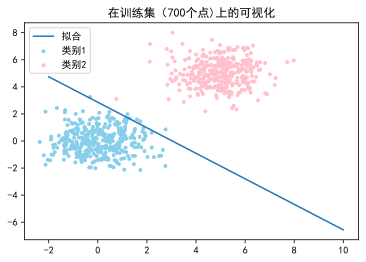

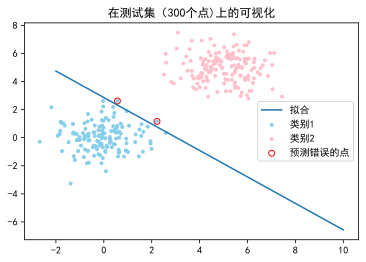

In [6]:
pred_label = []
for i in range(test_data.shape[0]):
    pred = fun(weight[0] * test_data[i][0] + weight[1] * test_data[i][1] + bias)
    pred_label.append(pred)

wrong_data = []
for i in range(len(test_label)):
    if (pred_label[i] != test_label[i]):
        wrong_data.append(test_data[i])
accuracy = (len(test_data)-len(wrong_data))/len(test_data)
print("在测试集的准确率为：", accuracy)


#在训练集上可视化
xTrainSet1=[]; yTrainSet1=[]
xTrainSet2=[]; yTrainSet2=[]
for i,v in enumerate(trainDataX):
    if trainDataY[i]==0:
        xTrainSet1.append(v[0])
        yTrainSet1.append(v[1])
    else:
        xTrainSet2.append(v[0])
        yTrainSet2.append(v[1])
x_points = np.linspace(-2, 10, 12)
y_ = -(weight[0] * x_points + bias) / weight[1]
plt.scatter(xTrainSet1, yTrainSet1,c='skyblue',marker='.', label = "类别1")
plt.scatter(xTrainSet2, yTrainSet2,c='pink',marker='.', label = "类别2")
plt.plot(x_points, y_, label = "拟合")
plt.title("在训练集（" + str(len(train_data)) + "个点)上的可视化")
plt.legend()
plt.show()

#在测试集上可视化
xTestSet1=[]; yTestSet1=[]
xTestSet2=[]; yTestSet2=[]
for i,v in enumerate(test_data):
    if test_label[i]==0:
        xTestSet1.append(v[0])
        yTestSet1.append(v[1])
    else:
        xTestSet2.append(v[0])
        yTestSet2.append(v[1])
wrongX = []
wrongY = []
for i in range(len(wrong_data)):
    wrongX.append(wrong_data[i][0])
    wrongY.append(wrong_data[i][1])
x_points = np.linspace(-2, 10, 12)
y_ = -(weight[0] * x_points + bias) / weight[1]
plt.scatter(xTestSet1, yTestSet1,c='skyblue',marker='.', label = "类别1")
plt.scatter(xTestSet2, yTestSet2,c='pink',marker='.', label = "类别2")
plt.scatter(wrongX, wrongY,c='none',marker='o',edgecolors='r', label = "预测错误的点")
plt.plot(x_points, y_, label = "拟合")
plt.title("在测试集（" + str(len(test_data)) + "个点)上的可视化")
plt.legend()
plt.show()


    